In [1]:
# Using the classic iris dataset for KNN with scikit-learn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

#Load dataset
iris_data = datasets.load_iris()
print(iris_data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [2]:
# np.c_ is the numpy concatenate function
iris_df = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                      columns= iris_data['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
# Get data summary
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# Split the independent variables from the dependent
x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

In [5]:
x.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [ ]:
y.head()

In [6]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 4)


In [7]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


In [8]:
# Test for k accuracy score
k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

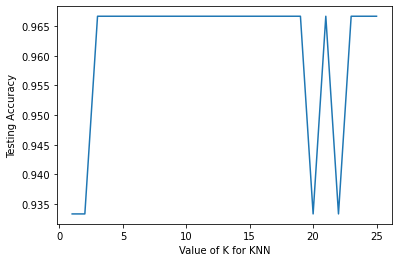

In [9]:
plt.plot(k_range, scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

# Find that optimal k value is 5

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)

model1 = knn.fit(x,y)
print(model1)

print(y)

KNeighborsClassifier()
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64


In [49]:
# Predicted vs observed
y_predict = knn.predict(x)

df_observed_v_predict = pd.DataFrame({'observed':y, 'predicted':y_predict})

print(df_observed_v_predict)

     observed  predicted
0         0.0        0.0
1         0.0        0.0
2         0.0        0.0
3         0.0        0.0
4         0.0        0.0
..        ...        ...
145       2.0        2.0
146       2.0        2.0
147       2.0        2.0
148       2.0        2.0
149       2.0        2.0

[150 rows x 2 columns]


Text(0, 0.5, 'Observed Values')

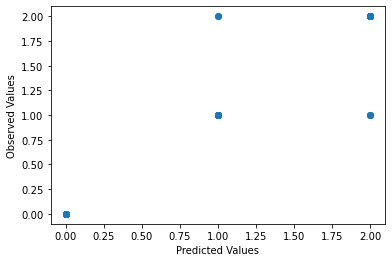

In [53]:
# Normally KNN doesn't require validation but predicted vs observed
# are plotted on graphs below just to see the similarities

import matplotlib.pyplot as plt 

plt.scatter(df_observed_v_predict['predicted'], df_observed_v_predict['observed'])
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')

([<matplotlib.axis.XTick at 0x7faf89027610>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

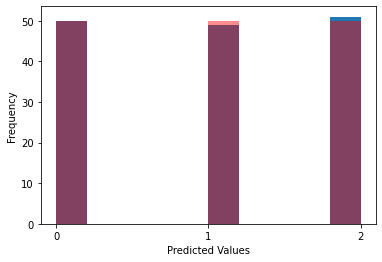

In [57]:
plt.hist(df_observed_v_predict['predicted'])
plt.hist(df_observed_v_predict['observed'], color = "red", alpha = 0.45)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.xticks([0,1,2])

In [37]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

# Creating DF for unseen data predictions
new_df = pd.DataFrame(np.random.randint(0,8,size=(100, 4)), columns=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"])

print(new_df)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                   4                 4                  7                 0
1                   2                 0                  5                 0
2                   1                 1                  1                 5
3                   3                 0                  5                 7
4                   2                 6                  1                 6
..                ...               ...                ...               ...
95                  2                 0                  6                 6
96                  5                 6                  1                 2
97                  1                 2                  7                 1
98                  0                 6                  2                 3
99                  4                 0                  5                 1

[100 rows x 4 columns]


In [38]:
# Make predictions
y_predict = knn.predict(new_df)

predictions = []

for i in range(0,len(new_df)):
    predictions.append(classes[y_predict[i]])
    
new_df['class']=predictions
print(new_df)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                   4                 4                  7                 0   
1                   2                 0                  5                 0   
2                   1                 1                  1                 5   
3                   3                 0                  5                 7   
4                   2                 6                  1                 6   
..                ...               ...                ...               ...   
95                  2                 0                  6                 6   
96                  5                 6                  1                 2   
97                  1                 2                  7                 1   
98                  0                 6                  2                 3   
99                  4                 0                  5                 1   

         class  
0    virginica  
1   v